In [2]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_validate
from sklearn import datasets

In [3]:
# laad the Iris dataset and define feature and target variables
iris_data = datasets.load_iris()

features = iris_data.data
targets = iris_data.target

In [5]:
# split dataset fot training and testing. %80 for training, %20 for testing with test_size=0.2 parameter.
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2)

In [10]:
# create the Decision Tree model and cross validate
model = DecisionTreeClassifier(criterion="entropy")
predicted = cross_validate(model, features, targets, cv=10)

In [11]:
#print the accuracy
print(np.mean(predicted["test_score"]))

0.9533333333333334


Here is what happens behind:

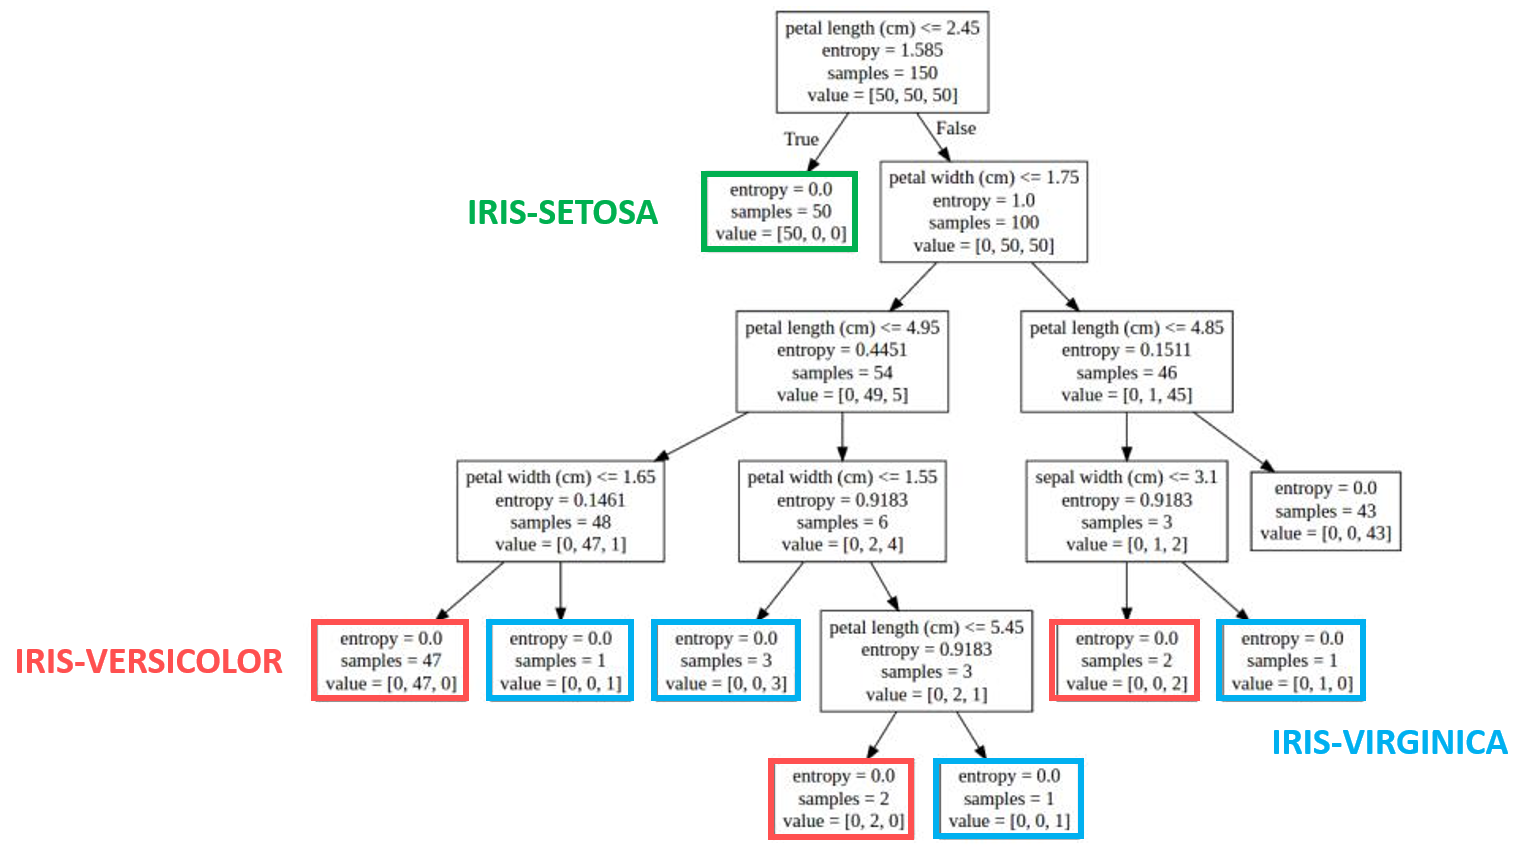

## <b>Fine Tuning of The Decision Tree Model</b>

In [12]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import datasets
from sklearn.model_selection import GridSearchCV

In [13]:
# laad the Iris dataset and define feature and target variables
iris_data = datasets.load_iris()

features = iris_data.data
targets = iris_data.target

In [14]:
# define parameters to check for fine tuned model
param_grid = {"max_depth": np.arange(1,10)}

In [15]:
# split dataset fot training and testing. %80 for training, %20 for testing with test_size=0.2 parameter.
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2)

In [16]:
# Find best parametes with GridSearchCV, create the model with that parameter and start training
tree = GridSearchCV(DecisionTreeClassifier(), param_grid)
tree.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [17]:
# Lets see what is the best param
tree.best_params_

{'max_depth': 3}

In [20]:
# predict with the model and show accuarcy metrics
tuned_model_predictions = tree.predict(X_test)
print(confusion_matrix(y_test, tuned_model_predictions))
print(accuracy_score(y_test, tuned_model_predictions))

[[11  0  0]
 [ 0  9  1]
 [ 0  0  9]]
0.9666666666666667
